<a href="https://colab.research.google.com/github/sifanurfa/PPD-Forecasting/blob/main/05Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# fungsi & model

In [ ]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import math
from sklearn.metrics import mean_squared_error
from numpy import array
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import pearsonr
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error
from numpy import array
from scipy.stats import kurtosis, skew

## buat fungsi untuk merubah timeseries data menjadi input X dan output y, dengan teknik sliding window

In [ ]:
def split_sequences(sequences, n_steps_in, n_steps_out):
  X, y = list(), list()
  for i in range(len(sequences)):
    # tentukan indeks akhir dari input
    end_ix = i + n_steps_in
    out_end_ix = end_ix + n_steps_out

    # kalau melewati panjang data, hentikan loop
    if out_end_ix > len(sequences):
      break

    # ambil bagian input (fitur) dan output (target)
    seq_x, seq_y = sequences[i:end_ix, :-1], sequences[out_end_ix - 1, -1]

    # simpan ke list
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

https://chatgpt.com/share/68cef87b-87cc-8002-82bd-fb7fd461b2a5

## Fungsi tambahan untuk membuat statistical features, harapannya bisa meningkatkan akurasi

In [ ]:
def stats_features(input_data):
  inp = list()
  for i in range(len(input_data)):
    inp2 = list()
    inp2 = input_data[i]
    min = float(np.min(inp2))
    max = float(np.max(inp2))
    diff = (max-min)
    std = float(np.std(inp2))
    mean = float(np.mean(inp2))
    median = float(np.median(inp2))
    kurt = float(kurtosis(inp2))
    sk = float(skew(inp2))
    inp2 = np.append(inp2, min)
    inp2 = np.append(inp2, max)
    inp2 = np.append(inp2, diff)
    inp2 = np.append(inp2, std)
    inp2 = np.append(inp2, mean)
    inp2 = np.append(inp2, median)
    inp2 = np.append(inp2, kurt)
    inp2 = np.append(inp2, sk)
    # print(list(inp2))
    inp2 = np.append(inp, inp2)
  # inp = inp.reshape(len(input_data), -1)
  inp = np.array(inp)   # ubah list ke numpy array
  inp = inp.reshape(len(input_data), -1)
  # print(inp)
  return inp

In [ ]:
def stats_features(input_data):
    input_data = np.array(input_data)  # pastikan numpy array
    result = []

    for row in input_data:
        row = row.astype(float)

        # fitur statistik
        stats = [
            np.min(row),
            np.max(row),
            np.max(row) - np.min(row),
            np.std(row),
            np.mean(row),
            np.median(row),
            kurtosis(row),
            skew(row)
        ]

        # gabungkan data asli + fitur statistik
        result.append(np.concatenate([row, stats]))

    return np.array(result)


## model untuk neural network

In [ ]:
def mlp (X_train, X_test, y_train, y_test):
    # mlp = multilayer perceptron / neural network for regression.
    # to setup parameter, please refer to = https://scikit-learn.org/stable/modules/generated/sklearn.neural_ne

    mlp_model = MLPRegressor(random_state=42)
    # mlp_model = MLPRegressor(hidden_layer_sizes=(100,100, ), max_iter=1000, random_state=42)

    # the model learning from training data
    mlp_model.fit(X_train, y_train)

    # get the prediction output
    y_pred = mlp_model.predict(X_test)
    y_pred = np.round(y_pred, 0)

    # get the root mean square error between prediction and real test data
    rmse = sqrt(mean_squared_error(y_test, y_pred))

    # get the pearson correlation
    corr, p_value = pearsonr(y_test, y_pred)

    # returning the output of RMSE, corr, and prediction result
    return rmse, corr, y_pred

## model untuk KNN

In [ ]:
def knn (X_train, X_test, y_train, y_test):
    # k nearest neighbor for regression.
    # to setup the parameter please refer to : https://scikit-learn.org/stable/modules/generated/sklearn.neighb

    knn_model = KNeighborsRegressor()

    # the model is learning from training data
    knn_model.fit(X_train, y_train)

    # get the prediction output
    y_pred = knn_model.predict(X_test)
    y_pred = np.round(y_pred, 0)

    # get the root mean square error between prediction and real test data
    rmse = sqrt(mean_squared_error(y_test, y_pred))

    # get the pearson correlation
    corr, p_value = pearsonr(y_test, y_pred)

    # returning the output of RMSE, corr, and prediction result
    return rmse, corr, y_pred

## model untuk decision tree

In [ ]:
def dt (X_train, X_test, y_train, y_test):
    model= DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred, 0)

    rmse = sqrt(mean_squared_error(y_test, y_pred))
    corr, p_value = pearsonr(y_test, y_pred)
    return rmse, corr, y_pred

## model untuk SVR

In [ ]:
def svm(X_train, X_test, y_train, y_test):
  model = SVR()
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  y_pred = np.round(y_pred, 0)

  rmse = sqrt(mean_squared_error(y_test, y_pred))
  corr, p_value = pearsonr(y_test, y_pred)
  return rmse, corr, y_pred

## model untuk random forest

In [ ]:
def rf(X_train, X_test, y_train, y_test):
  model = RandomForestRegressor(random_state=42)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  y_pred = np.round(y_pred, 0)

  rmse = sqrt(mean_squared_error(y_test, y_pred))
  corr, p_value = pearsonr(y_test, y_pred)
  return rmse, corr, y_pred

# praktikum

## read the dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sifanurfa/dataset/refs/heads/main/bikesharing_day.csv', delimiter=',')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df_ori = df
df_ori['date'] = pd.to_datetime(df_ori['dteday'])

df_ori['cnt'].iloc[:10]

,cnt
0,985
1,801
2,1349
3,1562
4,1600
5,1606
6,1510
7,959
8,822
9,1321


In [ ]:
df_ori['date'].head()

,date
0,2011-01-01
1,2011-01-02
2,2011-01-03
3,2011-01-04
4,2011-01-05


In [ ]:
df_ori['dteday'].head()

,dteday
0,2011-01-01
1,2011-01-02
2,2011-01-03
3,2011-01-04
4,2011-01-05


In [ ]:
df_X = df_ori[['cnt','cnt']]
in_seq = df_X.astype(float).values
#out_seq = df_y.astype(float).values

#in_seq1 = in_seq.reshape(in_seq.shape[0], in_seq.shape[1])
#out_seq = out_seq.reshape((len(out_seq), 1))

#from numpy import hstack
#dataset = hstack((in_seq1, out_seq))

n_steps_in, n_steps_out = 7, 1
X, y = split_sequences(in_seq, n_steps_in, n_steps_out)

n_input = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_input))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = False)
X_train = stats_features(X_train)
X_test = stats_features(X_test)


In [ ]:
in_seq

array([[ 985.,  985.],
       [ 801.,  801.],
       [1349., 1349.],
       ...,
       [1341., 1341.],
       [1796., 1796.],
       [2729., 2729.]])

In [ ]:
X

array([[ 985.,  801., 1349., ..., 1600., 1606., 1510.],
       [ 801., 1349., 1562., ..., 1606., 1510.,  959.],
       [1349., 1562., 1600., ..., 1510.,  959.,  822.],
       ...,
       [1749., 1787.,  920., ...,  441., 2114., 3095.],
       [1787.,  920., 1013., ..., 2114., 3095., 1341.],
       [ 920., 1013.,  441., ..., 3095., 1341., 1796.]])

In [ ]:
X.shape

(724, 7)

In [ ]:
X[0]

array([ 985.,  801., 1349., 1562., 1600., 1606., 1510.])

In [ ]:
y[0]

np.float64(959.0)

In [ ]:
df_new = df_ori[['date', 'cnt']]
df_new.set_index('date')

,cnt
date,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-27,2114
2012-12-28,3095
2012-12-29,1341


## EDA

/tmp/ipython-input-4245730793.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', fontsize=15)


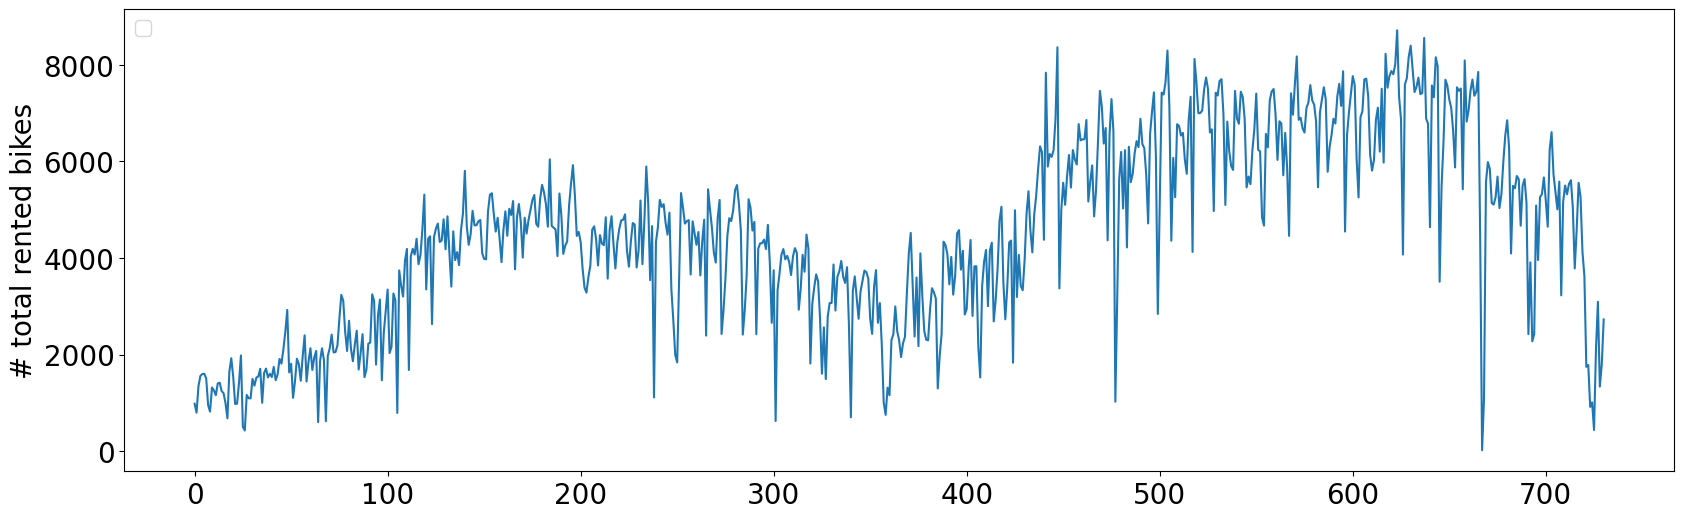

In [ ]:
fig1 = plt.figure(figsize=(20,6))
plt.plot(df_new['cnt'])
# plt.plot(df_new['cnt'], label='cnt')   # tambahin label di sini
#plt.xlabel('Time t', fontsize=20)
#because we use temperature data, so that the y axis is temperature
plt.ylabel('# total rented bikes', fontsize=20)
plt.legend(loc='upper left', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## cek input X dan y

ini baru muncul klo read dataset ke5 baris terakhir dikomen

In [ ]:
X_test

array([[ 7.26100000e+03,  7.17500000e+03,  6.82400000e+03, ...,
         7.17500000e+03,  1.26035954e+00, -1.61014201e+00],
       [ 7.17500000e+03,  6.82400000e+03,  5.46400000e+03, ...,
         7.17500000e+03,  1.24918864e+00, -1.60788578e+00],
       [ 6.82400000e+03,  5.46400000e+03,  7.01300000e+03, ...,
         7.01300000e+03, -1.06897210e+00, -7.44093013e-01],
       ...,
       [ 1.74900000e+03,  1.78700000e+03,  9.20000000e+02, ...,
         1.74900000e+03, -7.00875354e-01,  4.08689098e-01],
       [ 1.78700000e+03,  9.20000000e+02,  1.01300000e+03, ...,
         1.34100000e+03, -5.66707479e-01,  6.15554041e-01],
       [ 9.20000000e+02,  1.01300000e+03,  4.41000000e+02, ...,
         1.34100000e+03, -5.75176655e-01,  6.10415999e-01]])

In [ ]:
y_test

array([7286., 5786., 6299., 6544., 6883., 6784., 7347., 7605., 7148.,
       7865., 4549., 6530., 7006., 7375., 7765., 7582., 6053., 5255.,
       6917., 7040., 7697., 7713., 7350., 6140., 5810., 6034., 6864.,
       7112., 6203., 7504., 5976., 8227., 7525., 7767., 7870., 7804.,
       8009., 8714., 7333., 6869., 4073., 7591., 7720., 8167., 8395.,
       7907., 7436., 7538., 7733., 7393., 7415., 8555., 6889., 6778.,
       4639., 7572., 7328., 8156., 7965., 3510., 5478., 6392., 7691.,
       7570., 7282., 7109., 6639., 5875., 7534., 7461., 7509., 5424.,
       8090., 6824., 7058., 7466., 7693., 7359., 7444., 7852., 4459.,
         22., 1096., 5566., 5986., 5847., 5138., 5107., 5259., 5686.,
       5035., 5315., 5992., 6536., 6852., 6269., 4094., 5495., 5445.,
       5698., 5629., 4669., 5499., 5634., 5146., 2425., 3910., 2277.,
       2424., 5087., 3959., 5260., 5323., 5668., 5191., 4649., 6234.,
       6606., 5729., 5375., 5008., 5582., 3228., 5170., 5501., 5319.,
       5532., 5611.,

## panggil fungsi Machine learning model


In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (579, 15)
X_test shape: (145, 15)
y_train shape: (579,)
y_test shape: (145,)


In [ ]:
#calling the function mlp.
#returning rmse, pearson correlation, and prediction output
rmse_mlp, corr_mlp, y_pred_mlp = mlp(X_train, X_test, y_train, y_test)
rmse_knn, corr_knn, y_pred_knn = knn(X_train, X_test, y_train, y_test)
rmse_dt, corr_dt, y_pred_dt = dt(X_train, X_test, y_train, y_test)
rmse_rf, corr_rf, y_pred_rf = rf(X_train, X_test, y_train, y_test)

## visualisasi

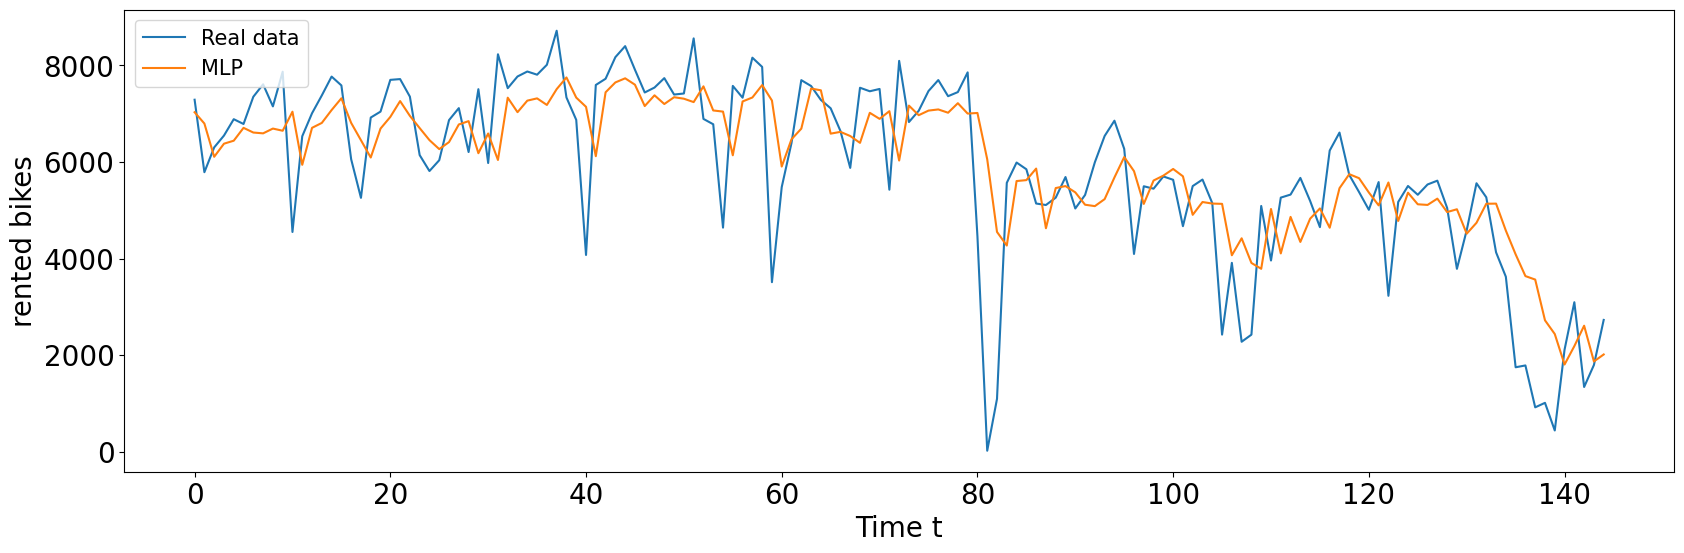

In [ ]:
fig1 = plt.figure(figsize=(20,6))
#plotting the result
# because the total number of test is data is high, so we just print the first 100 data
# y_test[0:100] get the first 100 data from y_test or real test data.
# y_pred_mlp is the prediction result from MLP
# y_pred_knn is the prediction result from KNN
plt.plot(y_test, label='Real data')

#plt.plot(y_pred_knn, label='KNN')
#plt.plot(y_pred_dt, label='DT')
#plt.plot(y_pred_rf, label='RF')

plt.plot(y_pred_mlp, label='MLP')
#title
#pyplot.title('First 100 Test Data')
#the x axis is timestamp, with interval 1 day
plt.xlabel('Time t', fontsize=20)
#because we use total rented bikes, so that the y axis is rented bikes
plt.ylabel('rented bikes', fontsize=20)
plt.legend(loc='upper left', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

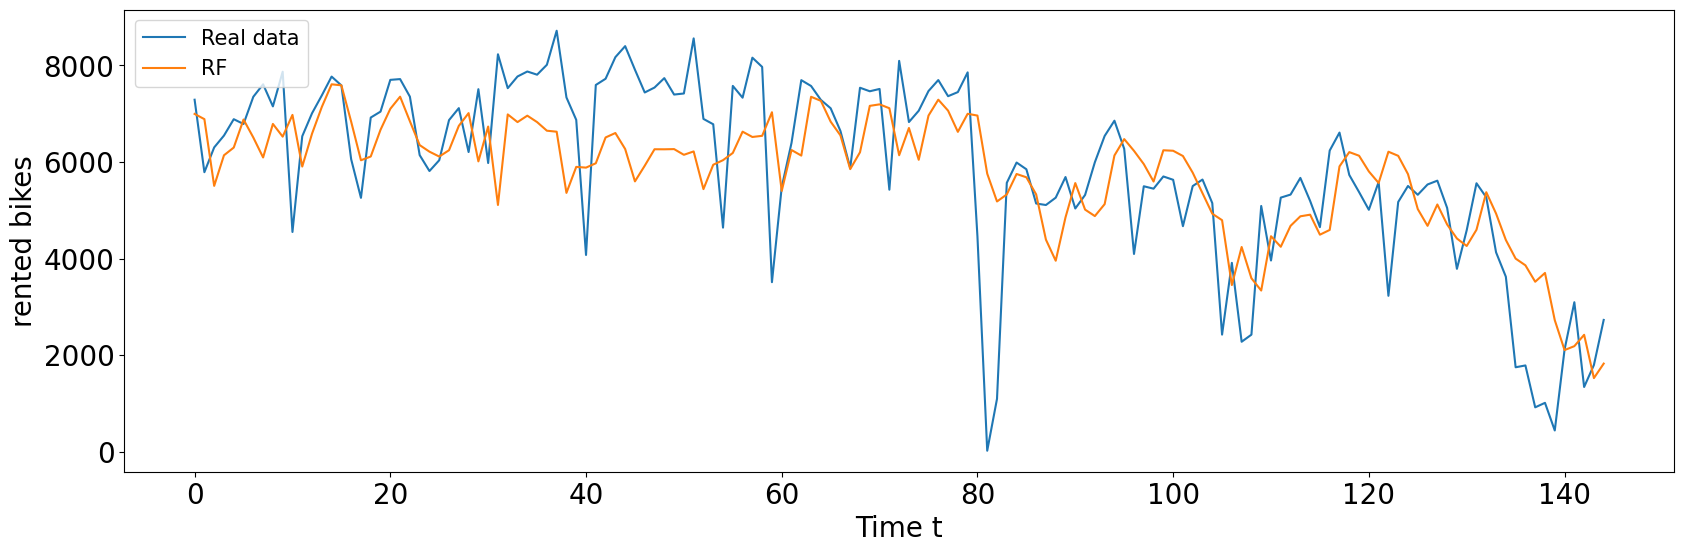

In [ ]:
fig1 = plt.figure(figsize=(20,6))
plt.plot(y_test, label='Real data')
# plt.plot(y_pred_mlp, label='MLP')
# plt.plot(y_pred_knn, label='KNN')
# plt.plot(y_pred_dt, label='DT')
plt.plot(y_pred_rf, label='RF')
plt.xlabel('Time t', fontsize=20)
plt.ylabel('rented bikes', fontsize=20)
plt.legend(loc='upper left', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [ ]:
#print out the RMSE , pearson correlation coefficient for MLP and KNN
# low RMSE is better
# high pearson correlation coefficient is better.
print('________________________')
print('MLP')
print('RMSE : %.3f' %rmse_mlp)
print('Pearson correlation coefficient: %.3f' %corr_mlp)
print('________________________')
print('KNN')
print('RMSE : %.3f' %rmse_knn)
print('Pearson correlation coefficient: %.3f' %corr_knn)
print('________________________')
print('DT')
print('RMSE : %.3f' %rmse_dt)
print('Pearson correlation coefficient: %.3f' %corr_dt)
print('________________________')
print('RF')
print('RMSE : %.3f' %rmse_rf)
print('Pearson correlation coefficient: %.3f' %corr_rf)

________________________
MLP
RMSE : 1190.549
Pearson correlation coefficient: 0.778
________________________
KNN
RMSE : 1357.710
Pearson correlation coefficient: 0.696
________________________
DT
RMSE : 1854.465
Pearson correlation coefficient: 0.484
________________________
RF
RMSE : 1324.452
Pearson correlation coefficient: 0.716


# tugas

## read dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sifanurfa/dataset/refs/heads/main/TSLA.csv', delimiter=',')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
df_ori = df
df_ori['date'] = pd.to_datetime(df_ori['Date'])

df_ori['Close'].iloc[:10]

,Close
0,23.889999
1,23.830000
2,21.959999
3,19.200001
4,16.110001
5,15.800000
6,17.459999
7,17.400000
8,17.049999
9,18.139999


## close only

In [ ]:
df_X = df[['Close','Close']]
in_seq = df_X.astype(float).values

n_steps_in, n_steps_out = 7, 2
X, y = split_sequences(in_seq, n_steps_in, n_steps_out)

n_input = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_input))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = False)
X_train = stats_features(X_train)
X_test = stats_features(X_test)

#####################################

# n_steps_in, n_steps_out = 7, 2
# data_close = df[['Close']].astype(float).values
# X, y = split_sequences(data_close, n_steps_in, n_steps_out)

# n_input = X.shape[1] * X.shape[2]
# X = X.reshape((X.shape[0], n_input))
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# X_train = stats_features(X_train)
# X_test = stats_features(X_test)


#######################################

# n_steps_in, n_steps_out = 7, 2
# data_close = df[['Close']].astype(float).values
# X, y = split_sequences(data_close, n_steps_in, n_steps_out)

# # X sekarang shape: (samples, 7, 1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# # flatten window dan tambah fitur statistik
# X_train = stats_features(X_train)
# X_test = stats_features(X_test)

In [ ]:
in_seq

array([[ 23.889999,  23.889999],
       [ 23.83    ,  23.83    ],
       [ 21.959999,  21.959999],
       ...,
       [640.809998, 640.809998],
       [650.570007, 650.570007],
       [780.      , 780.      ]])

In [ ]:
X

array([[ 23.889999,  23.83    ,  21.959999, ...,  16.110001,  15.8     ,
         17.459999],
       [ 23.83    ,  21.959999,  19.200001, ...,  15.8     ,  17.459999,
         17.4     ],
       [ 21.959999,  19.200001,  16.110001, ...,  17.459999,  17.4     ,
         17.049999],
       ...,
       [510.5     , 547.200012, 569.559998, ..., 564.820007, 558.02002 ,
        566.900024],
       [547.200012, 569.559998, 572.200012, ..., 558.02002 , 566.900024,
        580.98999 ],
       [569.559998, 572.200012, 564.820007, ..., 566.900024, 580.98999 ,
        640.809998]])

In [ ]:
X.shape

(2408, 7)

In [ ]:
X[0]

array([23.889999, 23.83    , 21.959999, 19.200001, 16.110001, 15.8     ,
       17.459999])

In [ ]:
y[0]

np.float64(17.049999)

In [ ]:
df_new = df_ori[['Date', 'Close']]
df_new.set_index('Date')

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001
...,...
2020-01-28,566.900024
2020-01-29,580.989990
2020-01-30,640.809998


## EDA

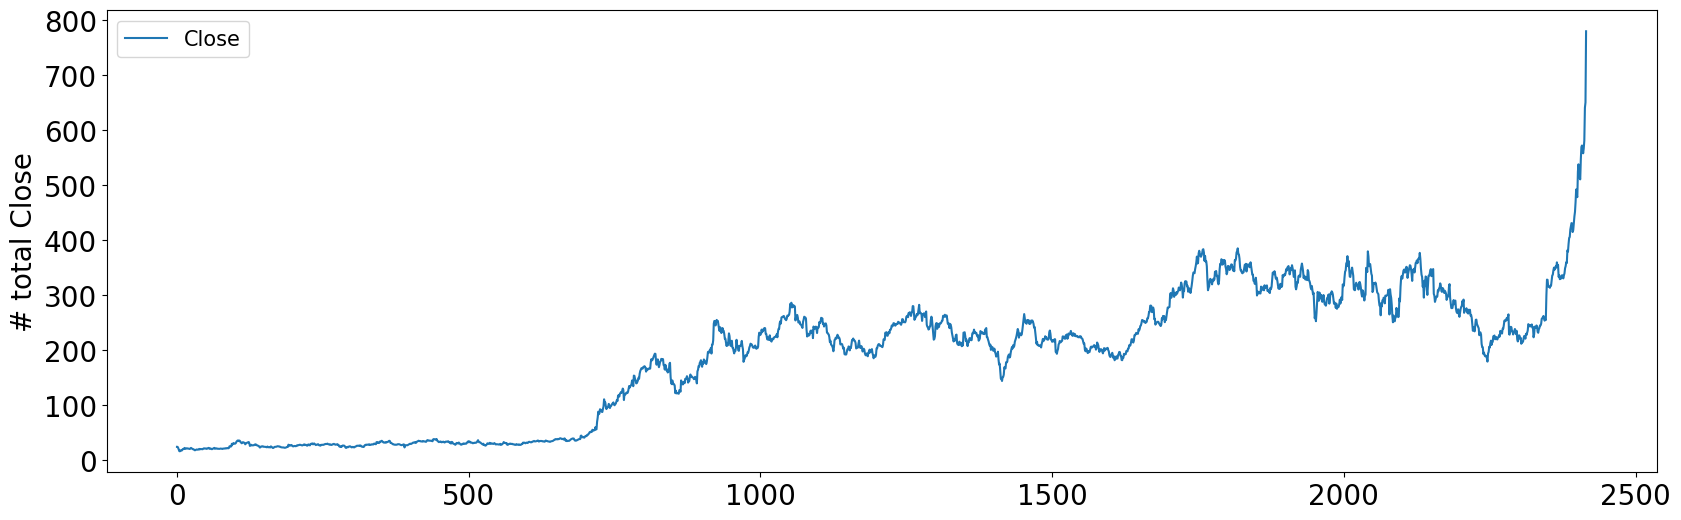

In [ ]:
fig1 = plt.figure(figsize=(20,6))
plt.plot(df_new['Close'], label='Close')
plt.ylabel('# total Close', fontsize=20)
plt.legend(loc='upper left', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## cek input X dan y

In [ ]:
X_test

array([[ 3.46170013e+02,  3.52049988e+02,  3.57420013e+02, ...,
         3.46170013e+02, -1.15810059e+00, -3.04419954e-01],
       [ 3.52049988e+02,  3.57420013e+02,  3.50989990e+02, ...,
         3.43059998e+02, -1.57873939e+00,  8.93749393e-02],
       [ 3.57420013e+02,  3.50989990e+02,  3.43059998e+02, ...,
         3.35119995e+02, -1.15801565e+00,  5.62181945e-01],
       ...,
       [ 5.10500000e+02,  5.47200012e+02,  5.69559998e+02, ...,
         5.64820007e+02,  8.38740037e-01, -1.48351885e+00],
       [ 5.47200012e+02,  5.69559998e+02,  5.72200012e+02, ...,
         5.66900024e+02, -4.31199684e-01, -4.06951300e-01],
       [ 5.69559998e+02,  5.72200012e+02,  5.64820007e+02, ...,
         5.69559998e+02,  1.60410113e+00,  1.78372001e+00]])

In [ ]:
y_test

array([328.200012, 332.299988, 329.100006, 327.170013, 345.51001 ,
       341.839996, 326.630005, 325.600006, 321.350006, 313.559998,
       310.549988, 316.529999, 309.100006, 301.540009, 304.179993,
       279.179993, 257.779999, 266.130005, 252.479996, 267.529999,
       286.940002, 305.720001, 299.299988, 289.660004, 304.700012,
       300.929993, 294.079987, 300.339996, 291.209991, 287.690002,
       293.350006, 300.079987, 290.23999 , 283.369995, 283.459991,
       280.690002, 285.480011, 294.079987, 293.899994, 299.920013,
       301.149994, 284.450012, 294.089996, 302.769989, 301.970001,
       306.850006, 305.019989, 301.059998, 291.970001, 284.179993,
       286.480011, 284.540009, 276.820007, 284.48999 , 275.01001 ,
       279.070007, 277.850006, 278.850006, 283.76001 , 291.720001,
       284.730011, 291.820007, 296.73999 , 291.130005, 319.5     ,
       316.089996, 317.660004, 332.100006, 342.769989, 344.779999,
       357.720001, 358.170013, 370.829987, 352.549988, 362.220

## panggil model ML

In [ ]:
#calling the function mlp.
#returning rmse, pearson correlation, and prediction output
rmse_mlp, corr_mlp, y_pred_mlp = mlp(X_train, X_test, y_train, y_test)
#calling the function knn
#returning rmse, pearson correlation, and prediction output
rmse_knn, corr_knn, y_pred_knn = knn(X_train, X_test, y_train, y_test)
rmse_dt, corr_dt, y_pred_dt = dt(X_train, X_test, y_train, y_test)
#rmse_svm, corr_svm, y_pred_svm = svm(X_train, X_test, y_train, y_test)
rmse_rf, corr_rf, y_pred_rf = rf(X_train, X_test, y_train, y_test)

## visualisasi

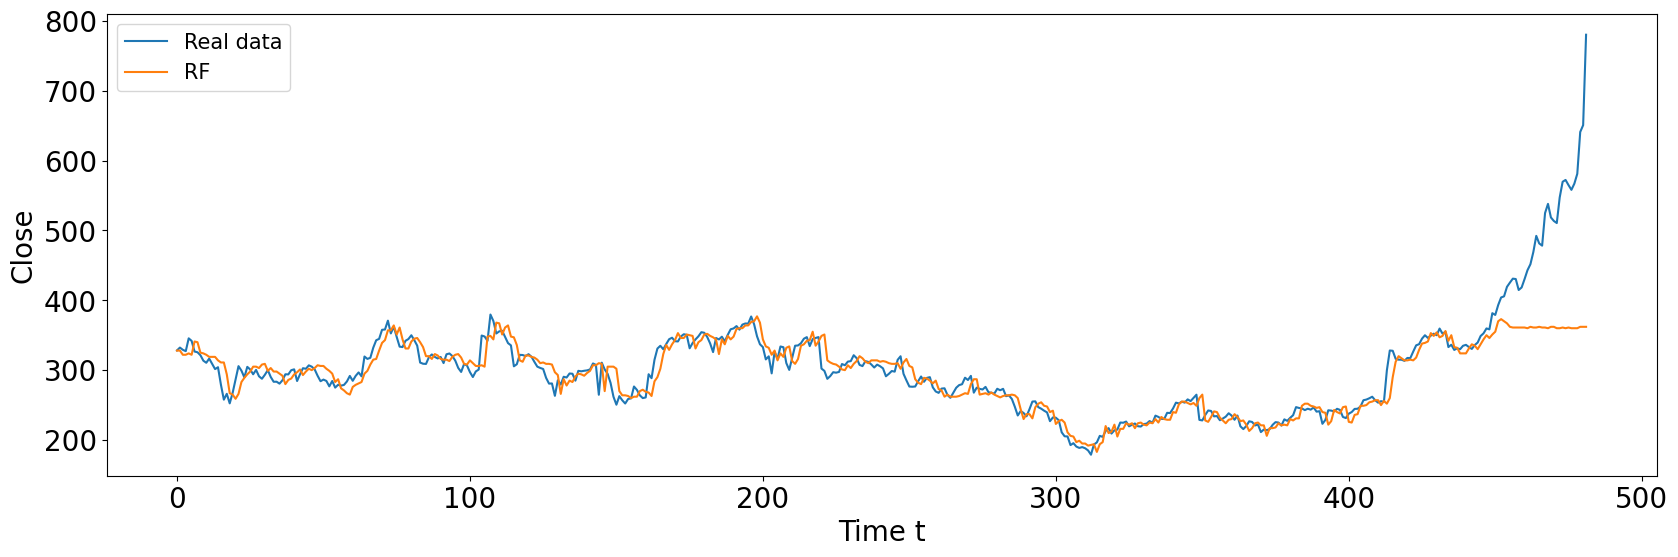

In [ ]:
fig1 = plt.figure(figsize=(20,6))
#plotting the result
# because the total number of test is data is high, so we just print the first 100 data
# y_test[0:100] get the first 100 data from y_test or real test data.
# y_pred_mlp is the prediction result from MLP
# y_pred_knn is the prediction result from KNN
plt.plot(y_test, label='Real data')

# plt.plot(y_pred_knn, label='KNN')
# plt.plot(y_pred_dt, label='DT')
plt.plot(y_pred_rf, label='RF')

# plt.plot(y_pred_mlp, label='MLP')
#title
#pyplot.title('First 100 Test Data')
#the x axis is timestamp, with interval 1 day
plt.xlabel('Time t', fontsize=20)
#because we use total rented bikes, so that the y axis is rented bikes
plt.ylabel('Close', fontsize=20)
plt.legend(loc='upper left', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [ ]:
#print out the RMSE , pearson correlation coefficient for MLP and KNN
# low RMSE is better
# high pearson correlation coefficient is better.
print('________________________')
print('MLP')
print('RMSE : %.3f' %rmse_mlp)
print('Pearson correlation coefficient: %.3f' %corr_mlp)
print('________________________')
print('KNN')
print('RMSE : %.3f' %rmse_knn)
print('Pearson correlation coefficient: %.3f' %corr_knn)
print('________________________')
print('DT')
print('RMSE : %.3f' %rmse_dt)
print('Pearson correlation coefficient: %.3f' %corr_dt)
print('________________________')
print('RF')
print('RMSE : %.3f' %rmse_rf)
print('Pearson correlation coefficient: %.3f' %corr_rf)

________________________
MLP
RMSE : 18.469
Pearson correlation coefficient: 0.969
________________________
KNN
RMSE : 45.187
Pearson correlation coefficient: 0.800
________________________
DT
RMSE : 47.492
Pearson correlation coefficient: 0.772
________________________
RF
RMSE : 44.963
Pearson correlation coefficient: 0.805


## open + close

In [ ]:
data_oc = df[['Open', 'Close', 'Close']].astype(float).values
X, y = split_sequences(data_oc, n_steps_in, n_steps_out)

n_input = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_input))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train = stats_features(X_train)
X_test = stats_features(X_test)

print("\n=== Forecasting Close 2 hari ke depan (input: 7 hari Open+Close) ===")
rmse_mlp, corr_mlp, y_pred_mlp = mlp(X_train, X_test, y_train, y_test)
rmse_knn, corr_knn, y_pred_knn = knn(X_train, X_test, y_train, y_test)
rmse_dt, corr_dt, y_pred_dt = dt(X_train, X_test, y_train, y_test)
rmse_rf, corr_rf, y_pred_rf = rf(X_train, X_test, y_train, y_test)

print("MLP - RMSE:", rmse_mlp, "Corr:", corr_mlp)
print("KNN - RMSE:", rmse_knn, "Corr:", corr_knn)
print("DT  - RMSE:", rmse_dt, "Corr:", corr_dt)
print("RF  - RMSE:", rmse_rf, "Corr:", corr_rf)


=== Forecasting Close 2 hari ke depan (input: 7 hari Open+Close) ===
MLP - RMSE: 18.323179363194306 Corr: 0.9685901625539155
KNN - RMSE: 44.65952646436629 Corr: 0.8063991497340797
DT  - RMSE: 45.40752483516678 Corr: 0.7958528836406028
RF  - RMSE: 44.6913772462039 Corr: 0.8079705982839857


In [ ]:
df_X = df[['Open', 'Close', 'Close']]
in_seq = df_X.astype(float).values

n_steps_in, n_steps_out = 7, 2
X, y = split_sequences(in_seq, n_steps_in, n_steps_out)

n_input = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_input))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = False)
X_train = stats_features(X_train)
X_test = stats_features(X_test)

In [ ]:
in_seq

array([[ 19.      ,  23.889999,  23.889999],
       [ 25.790001,  23.83    ,  23.83    ],
       [ 25.      ,  21.959999,  21.959999],
       ...,
       [632.419983, 640.809998, 640.809998],
       [640.      , 650.570007, 650.570007],
       [673.690002, 780.      , 780.      ]])

In [ ]:
y[0]

np.float64(17.049999)

In [ ]:
X[0]

array([19.      , 23.889999, 25.790001, 23.83    , 25.      , 21.959999,
       23.      , 19.200001, 20.      , 16.110001, 16.4     , 15.8     ,
       16.139999, 17.459999])

In [ ]:
X_test

array([[ 3.35529999e+02,  3.46170013e+02,  3.47829987e+02, ...,
         3.47000000e+02, -9.23452588e-01, -5.60620790e-01],
       [ 3.47829987e+02,  3.52049988e+02,  3.53500000e+02, ...,
         3.46419999e+02, -1.40223469e+00, -3.11380077e-01],
       [ 3.53500000e+02,  3.57420013e+02,  3.56250000e+02, ...,
         3.39089996e+02, -1.55473346e+00,  1.83672372e-01],
       ...,
       [ 5.07609985e+02,  5.10500000e+02,  5.30250000e+02, ...,
         5.64535004e+02, -2.60107354e-01, -1.07686731e+00],
       [ 5.30250000e+02,  5.47200012e+02,  5.71890015e+02, ...,
         5.67695007e+02,  2.77692777e-01, -1.09830024e+00],
       [ 5.71890015e+02,  5.69559998e+02,  5.64250000e+02, ...,
         5.70095001e+02,  1.40147781e+00,  1.53525284e+00]])

### panggil model

In [ ]:
rmse_mlp, corr_mlp, y_pred_mlp = mlp(X_train, X_test, y_train, y_test)
rmse_knn, corr_knn, y_pred_knn = knn(X_train, X_test, y_train, y_test)
rmse_dt, corr_dt, y_pred_dt = dt(X_train, X_test, y_train, y_test)
rmse_rf, corr_rf, y_pred_rf = rf(X_train, X_test, y_train, y_test)

### visualisasi

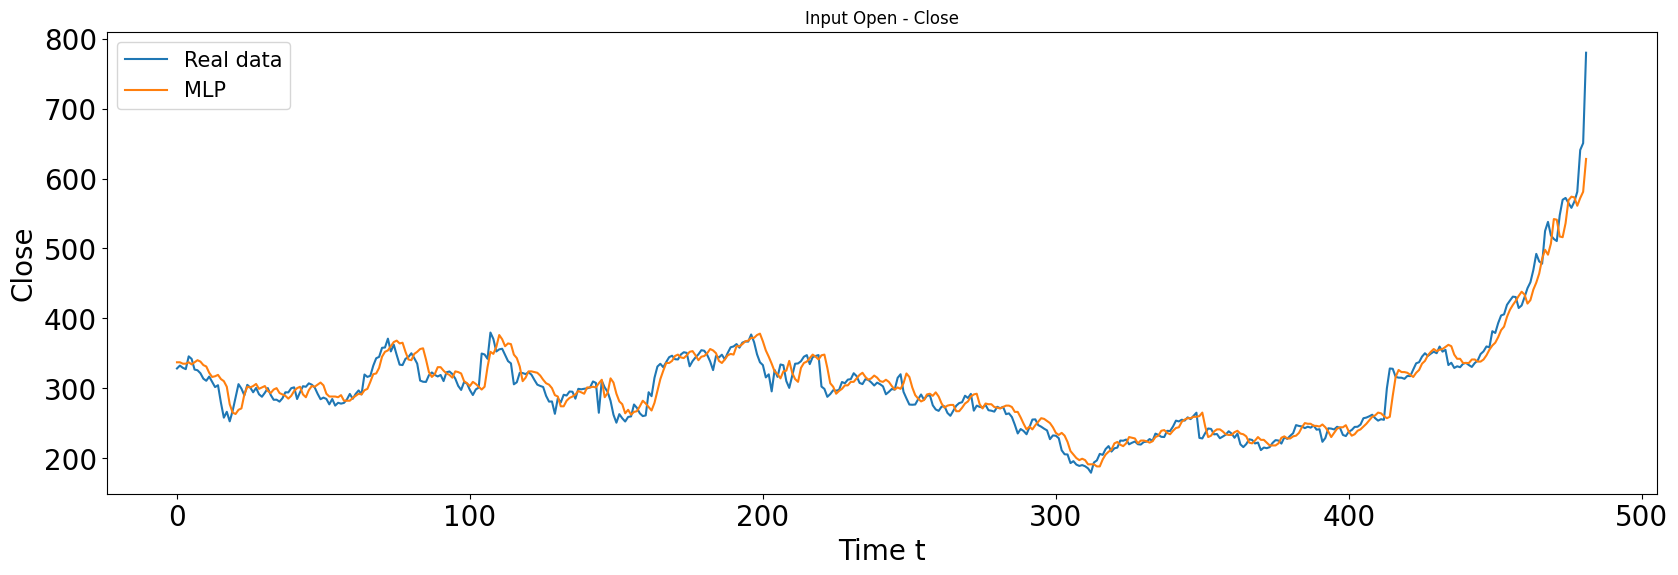

In [ ]:
fig1 = plt.figure(figsize=(20,6))
plt.plot(y_test, label='Real data')
plt.plot(y_pred_mlp, label='MLP')
# plt.plot(y_pred_knn, label='KNN')
# plt.plot(y_pred_dt, label='DT')
# plt.plot(y_pred_rf, label='RF')
plt.title('Input Open - Close')
plt.xlabel('Time t', fontsize=20)
plt.ylabel('Close', fontsize=20)
plt.legend(loc='upper left', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [ ]:
#print out the RMSE , pearson correlation coefficient for MLP and KNN
# low RMSE is better
# high pearson correlation coefficient is better.
print('________________________')
print('MLP')
print('RMSE : %.3f' %rmse_mlp)
print('Pearson correlation coefficient: %.3f' %corr_mlp)
print('________________________')
print('KNN')
print('RMSE : %.3f' %rmse_knn)
print('Pearson correlation coefficient: %.3f' %corr_knn)
print('________________________')
print('DT')
print('RMSE : %.3f' %rmse_dt)
print('Pearson correlation coefficient: %.3f' %corr_dt)
print('________________________')
print('RF')
print('RMSE : %.3f' %rmse_rf)
print('Pearson correlation coefficient: %.3f' %corr_rf)

________________________
MLP
RMSE : 18.323
Pearson correlation coefficient: 0.969
________________________
KNN
RMSE : 44.660
Pearson correlation coefficient: 0.806
________________________
DT
RMSE : 45.408
Pearson correlation coefficient: 0.796
________________________
RF
RMSE : 44.691
Pearson correlation coefficient: 0.808
